```
[Title] One-Way ANOVA
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - One-Way ANOVA for FDC Parameter
```

In [22]:
%pylab inline
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from pandasql import sqldf

Populating the interactive namespace from numpy and matplotlib


,GOOD_BAD,AVG_TIM_GAP
0,0,60962.635784
1,1,45780.817921


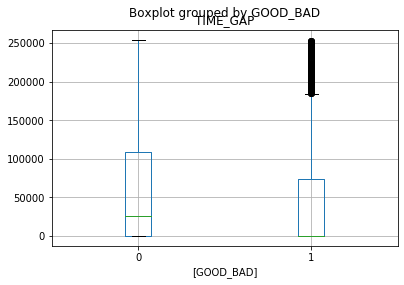

In [23]:
pysqldf = lambda q: sqldf(q, globals())
df = pd.read_csv("../data_source/WIP_HISTORY.csv")
df[['TIME_GAP','GOOD_BAD']].boxplot(by='GOOD_BAD')


sqlDf = pysqldf("select GOOD_BAD, avg(TIME_GAP) as AVG_TIM_GAP from df group by GOOD_BAD ;")
sqlDf


In [24]:
model = ols('GAS_PRESSURE ~ C(GOOD_BAD)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(GOOD_BAD),1.0,2.457254e+06,2.457254e+06,179.97583,1.101921e-40
Residual,9998.0,1.365052e+08,1.365325e+04,NaN,NaN
